Question 1

from 0 to 50
f1(x) = x

from 51 to 150
f2(x) = (155x / 100) + (255 - (155*150/100))

from 151 to 255
f3(x) = x

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [66]:
image = cv.imread('emma_new.jpg', cv.IMREAD_GRAYSCALE)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

t1 = np.arange(0,51).astype(np.uint8)
t2 = (np.arange(51,151).astype(np.uint8))*1.55 + (255 - 155*1.5)
t3 = np.arange(151,256).astype(np.uint8)
t = np.concatenate((t1,t2,t3)).astype(int)

print(type(t))


<class 'numpy.ndarray'>


<class 'numpy.ndarray'>


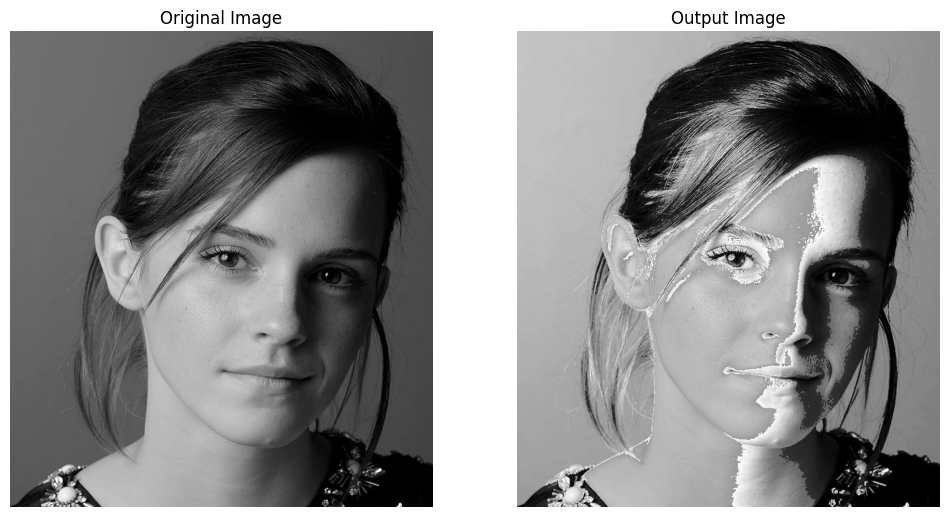

In [67]:

g = t[image]
print(type(t))

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(g, cmap = 'gray')
plt.title('Output Image')
plt.axis('off')

plt.show()


*Question 02*

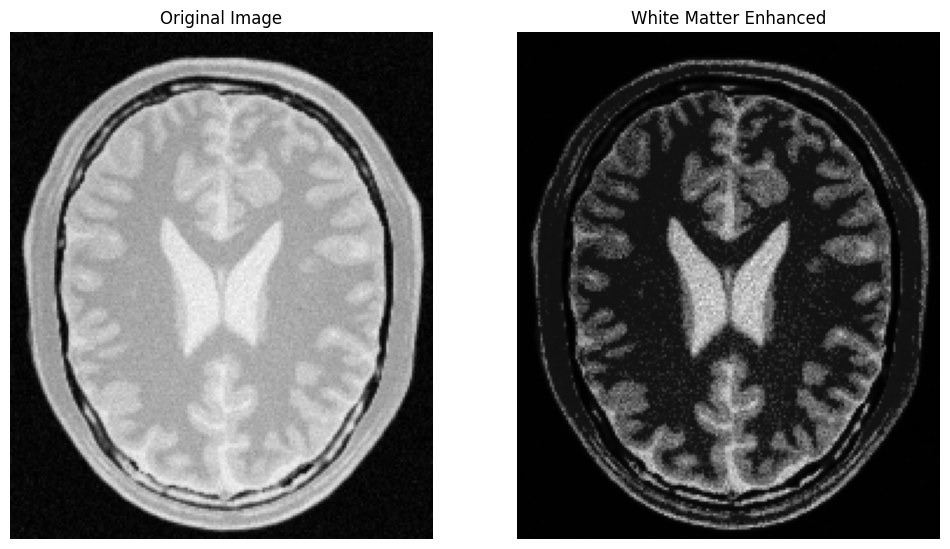

In [128]:
image2 = cv.imread('BrainProtonDensitySlice9.png')
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

divert_point = 170
coordinates = np.array([(1,1),(divert_point,20),(divert_point+1,20),(255,255)])
trans = np.array([0])


for i in range(int(len(coordinates)/2)):
    line = np.linspace(coordinates[0+2*i , 1], coordinates[1+2*i , 1], coordinates[1+2*i , 0] - coordinates[0+2*i , 0] + 1)
    trans = np.concatenate((trans , line)).astype(np.uint8)

#print(t)

g = trans[image2]

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(image2)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(g)
plt.title('White Matter Enhanced')
plt.axis('off')

plt.show()



Gray Matter Enhanced

256


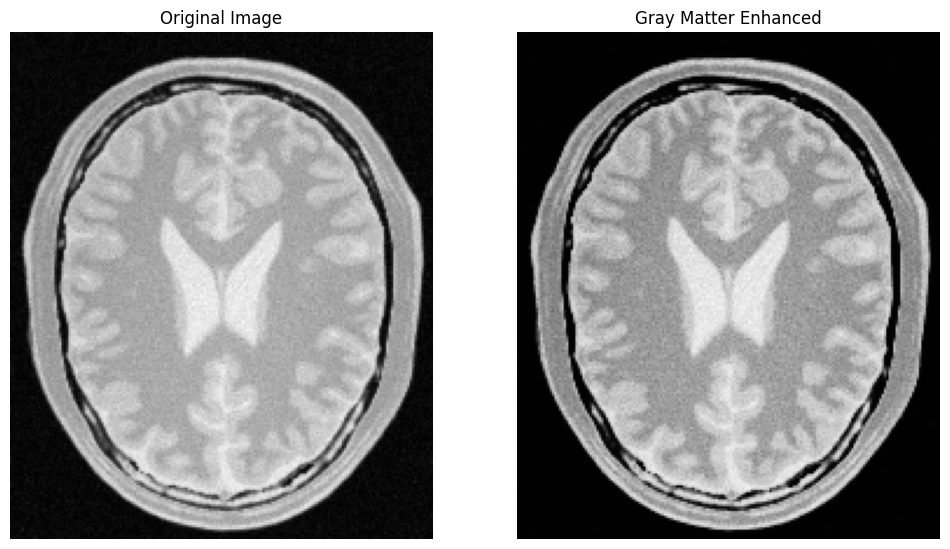

In [130]:
divert_point1 = 65
divert_point2 = 200

coordinates = np.array([(1,1),(divert_point1,10),
                        (divert_point1+1,10),(divert_point2,200),
                        (divert_point2+1,200),(255,255)])

trans = np.array([0])

for i in range(int(len(coordinates)/2)):
    line = np.linspace(coordinates[0+2*i , 1], coordinates[1+2*i , 1], coordinates[1+2*i , 0] - coordinates[0+2*i , 0] + 1)
    trans = np.concatenate((trans, line)).astype(np.uint8)

print(len(trans))

g = trans[image2]

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(image2)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(g)
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.show()


*Question 03*

In [ ]:
image3 = cv.imread('highlights_and_shadows.jpg')
image3 = cv.cvtCo

*Question 04*

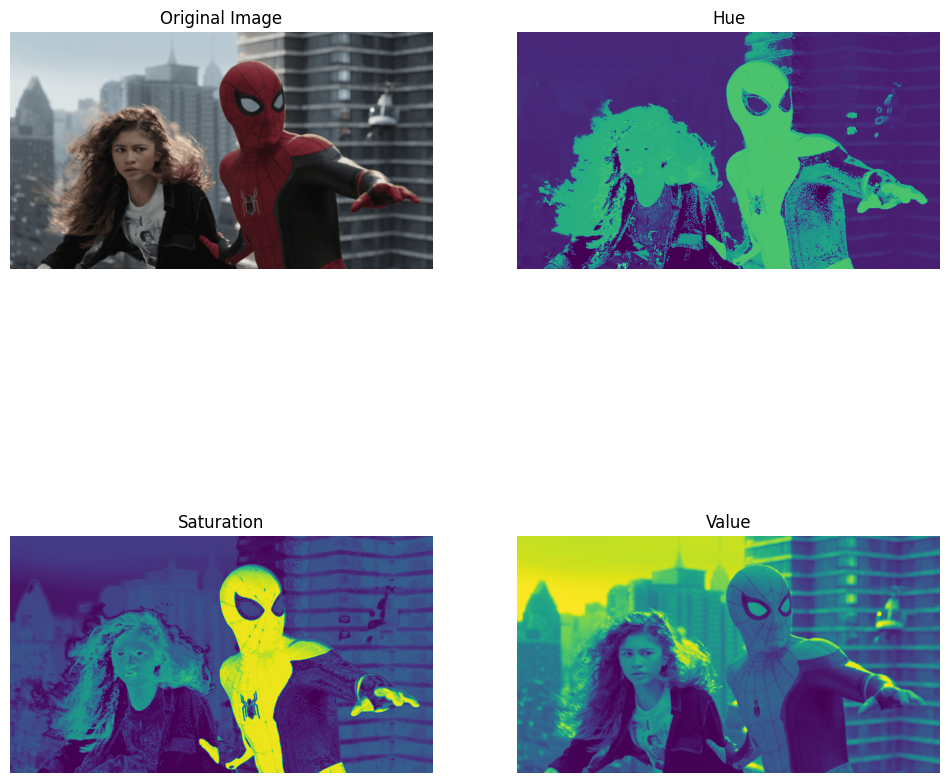

In [58]:
image4 = cv.imread('spider.png')
image4 = cv.cvtColor(image4,cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image4, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(hsv_image)

plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(image4)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(hue)
plt.title('Hue')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(saturation)
plt.title('Saturation')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(value)
plt.title('Value')
plt.axis('off')

plt.show()


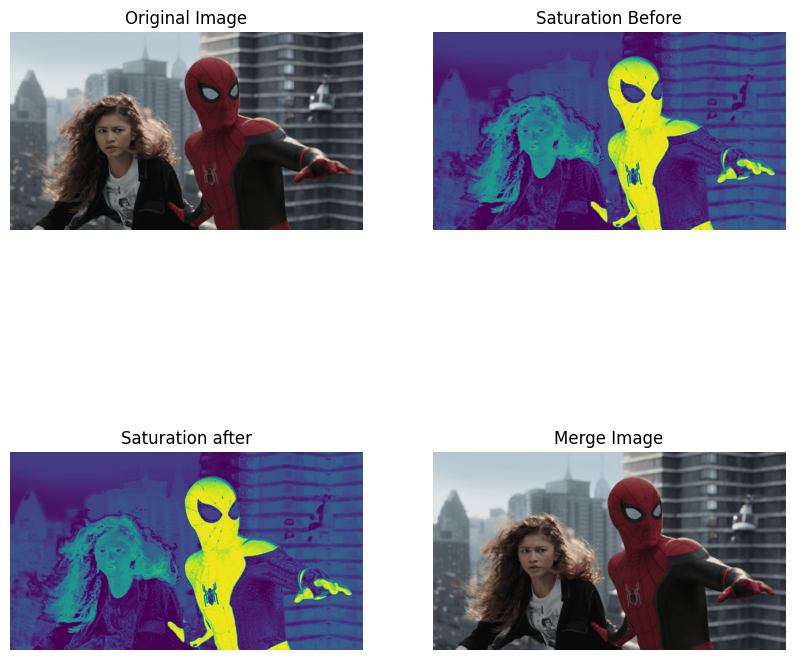

In [133]:
a = 0.9
alpha = 70

x = np.arange(0,256,1).astype(np.uint8)

new_x = [i + (a / 128) * np.exp((-1 * (i - 128)**2) / (2 * alpha ** 2)) for i in x]
new_x = np.clip(new_x, 0, 255)
new_x = np.array(new_x).astype(np.float32)

sat_copy = saturation.copy()
sat_update = cv.LUT(sat_copy, new_x)

# merge_img = cv.merge((hue, sat_update , value))
# merge_img = cv.cvtColor(merge_img, cv.COLOR_HSV2BGR)
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.imshow(image4)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(saturation)
plt.title('Saturation Before')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sat_update)
plt.title('Saturation after')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(merge_img)
plt.title('Merge Image')
plt.axis('off')

plt.show()